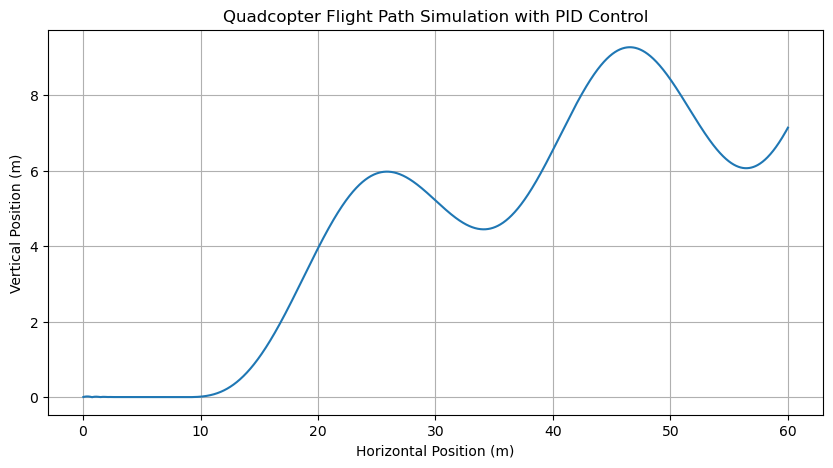

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import control 

def pid_controller(Kp, Ki, Kd):
    num = [Kd, Kp, Ki]  
    den = [1, 0]  
    return control.TransferFunction(num, den)

g = 9.81  
dt = 0.01 

Kp = 0.75
Ki = 0.08
Kd = 0.03

x, y, vx, vy = 0, 0, 3, 0
integral, prev_error = 0, 0

times = np.arange(0, 20, dt)
positions = {'x': [], 'y': []}

for t in times:
    error = 10 - y
    integral += error * dt
    derivative = (error - prev_error) / dt
    output = Kp * error + Ki * integral + Kd * derivative
    thrust = output  

    accel_y = thrust - g
    vy += accel_y * dt
    y += vy * dt + 0.5 * accel_y * dt**2

    x += vx * dt
    positions['x'].append(x)
    positions['y'].append(y)

    if y < 0:
        y, vy = 0, -vy * 0.9
    prev_error = error

plt.figure(figsize=(10, 5))
plt.plot(positions['x'], positions['y'])
plt.title('Quadcopter Flight Path Simulation with PID Control')
plt.xlabel('Horizontal Position (m)')
plt.ylabel('Vertical Position (m)')
plt.grid(True)
plt.show()
